### Aufgabe 2

Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df = pd.read_csv('Weine.csv')

In [25]:
print(f"Merkmale: {len(df.columns)}")
print(f"Datensätze: {len(df)}")

Merkmale: 13
Datensätze: 178


Show First 5 Rows

In [3]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [8]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [29]:
K = range(2, 25)

# K-Means Clustering
kmeans_scores = []
kmeans_silhouettes = []
kmeans_davies = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    kmeans_scores.append(kmeans.inertia_)
    kmeans_silhouettes.append(silhouette_score(data_scaled, labels))
    kmeans_davies.append(davies_bouldin_score(data_scaled, labels))

# Agglomerative Clustering
agg_silhouettes = []
agg_davies = []
for k in K:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(data_scaled)
    agg_silhouettes.append(silhouette_score(data_scaled, labels))
    agg_davies.append(davies_bouldin_score(data_scaled, labels))

# DBSCAN
dbscan_silhouettes = []
dbscan_davies = []
valid_eps = []
for k in K:
    dbscan = DBSCAN(eps=k)
    labels = dbscan.fit_predict(data_scaled)
    # Check if the number of unique clusters (excluding noise) is greater than 1
    if len(set(labels)) > 1:
        dbscan_silhouettes.append(silhouette_score(data_scaled, labels))
        dbscan_davies.append(davies_bouldin_score(data_scaled, labels))
        valid_eps.append(k)

# Gaussian Mixture Model
gmm_silhouettes = []
gmm_davies = []
for k in K:
    gmm = GaussianMixture(n_components=k)
    labels = gmm.fit_predict(data_scaled)
    gmm_silhouettes.append(silhouette_score(data_scaled, labels))
    gmm_davies.append(davies_bouldin_score(data_scaled, labels))

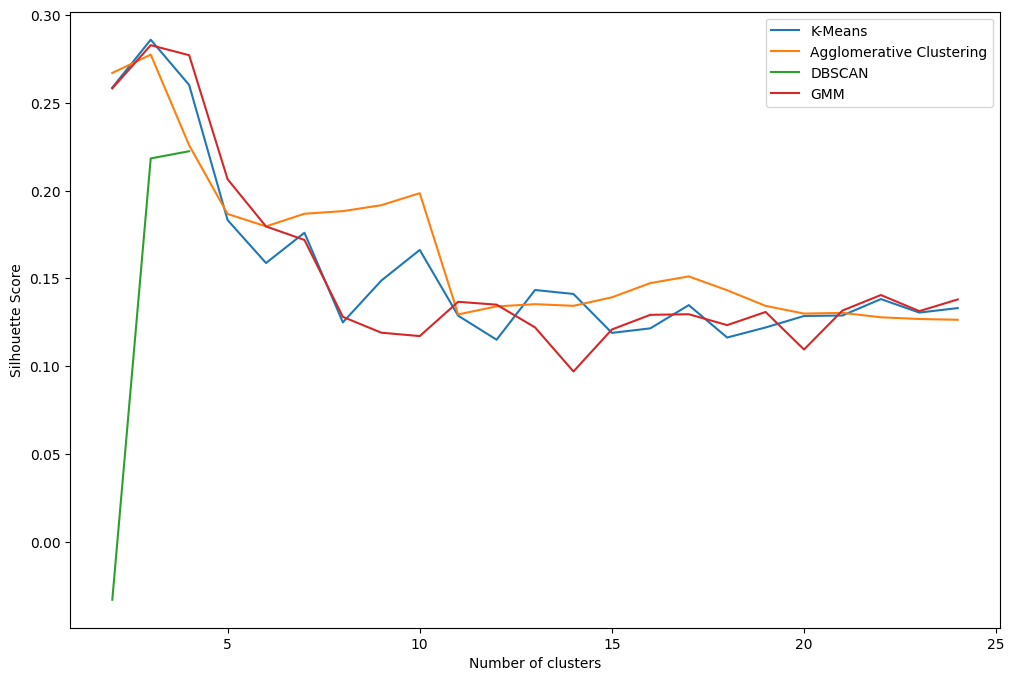

In [30]:
# Plot the results silhouettes
plt.figure(figsize=(12, 8))
plt.plot(K, kmeans_silhouettes, label='K-Means')
plt.plot(K, agg_silhouettes, label='Agglomerative Clustering')
plt.plot(valid_eps, dbscan_silhouettes, label='DBSCAN')
plt.plot(K, gmm_silhouettes, label='GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

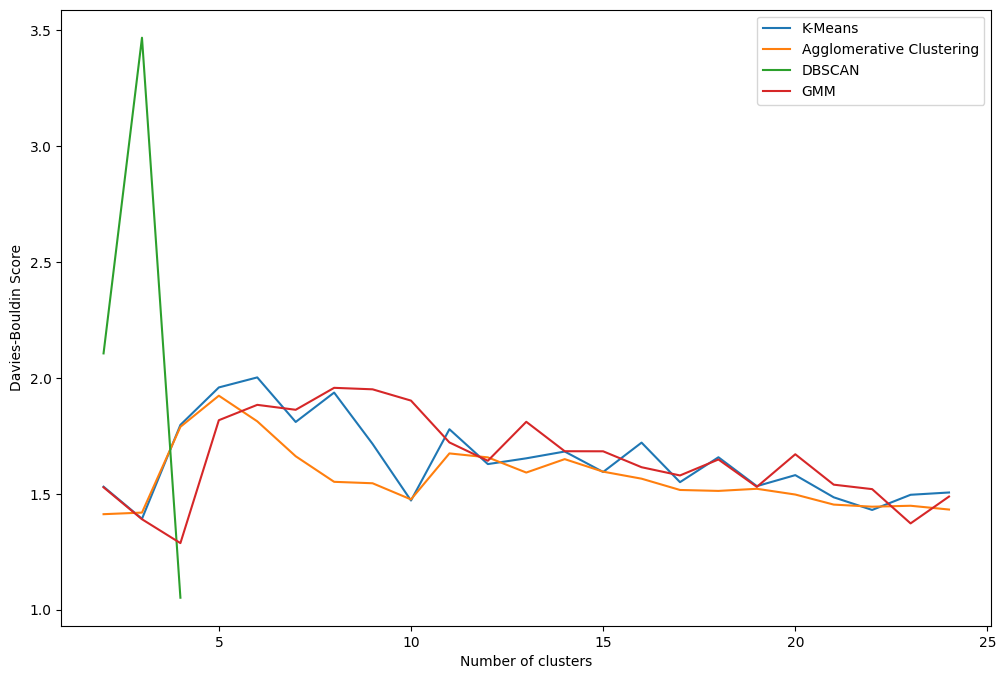

In [31]:
# Plot the results davies
plt.figure(figsize=(12, 8))
plt.plot(K, kmeans_davies, label='K-Means')
plt.plot(K, agg_davies, label='Agglomerative Clustering')
plt.plot(valid_eps, dbscan_davies, label='DBSCAN')
plt.plot(K, gmm_davies, label='GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()
plt.show()

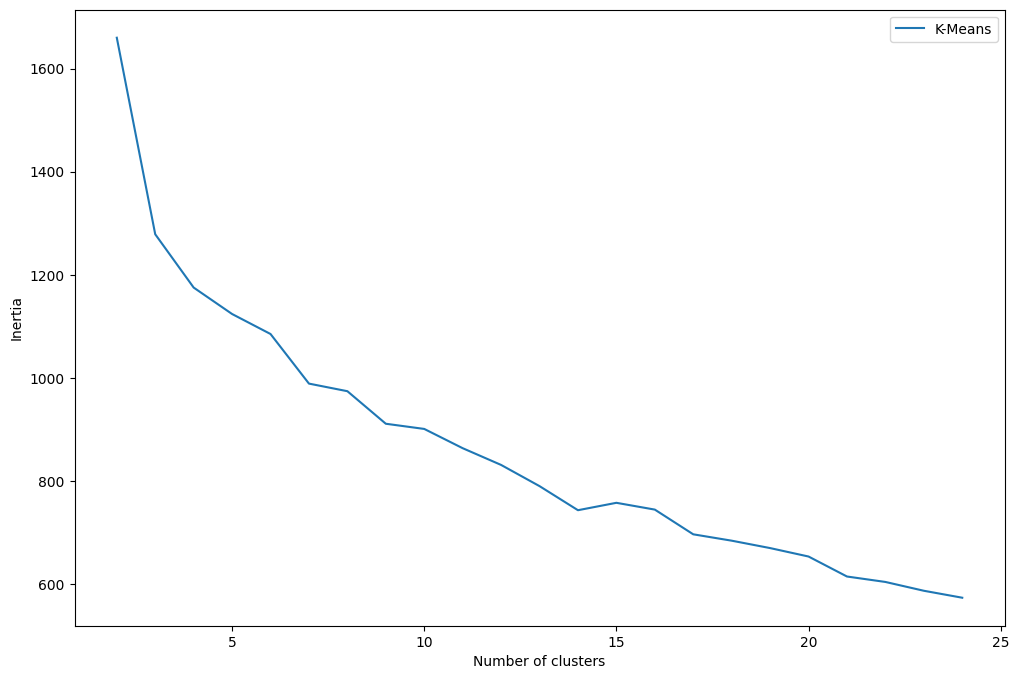

In [32]:
# Plot the results inertia
plt.figure(figsize=(12, 8))
plt.plot(K, kmeans_scores, label='K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()